In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'child_learning_data.csv'
data = pd.read_csv(file_path)

data.head()

,ChildID,TaskType,CompletionTime,AccuracyScore,RepetitionCount,GazeDirection,EngagementScore,AttentionDuration
0,Child_615,Animals,13,0.92,1,Up,1.00,15.2
1,Child_414,Animals,7,0.80,1,Up,0.96,13.0
2,Child_154,Math,9,0.88,3,Right,1.00,15.8
3,Child_587,Shapes,9,0.83,3,Down,1.00,17.3
4,Child_544,Reading,7,0.72,3,Center,0.96,15.2


In [4]:
# Step 1: Data Preprocessing
categorical_cols = ['TaskType', 'GazeDirection']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

In [5]:
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(columns=['EngagementScore', 'ChildID'])
y = data['EngagementScore']

In [6]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Step 2: Train the Dataset
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [8]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}


C:\Users\Ash\AppData\Local\Temp\ipykernel_17020\3124252726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')


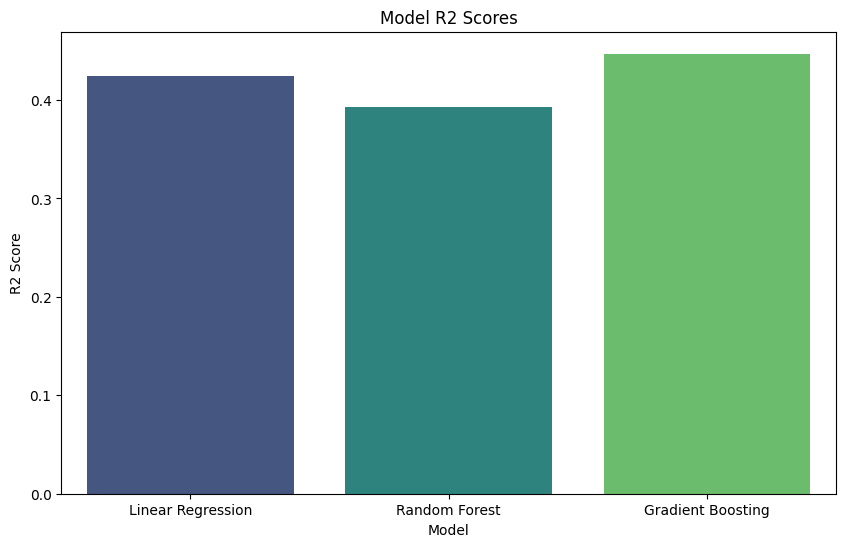

In [9]:
# Step 3: Visualize Results
results_df = pd.DataFrame(results).T

# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')
plt.title('Model R2 Scores')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.show()

C:\Users\Ash\AppData\Local\Temp\ipykernel_17020\236068164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


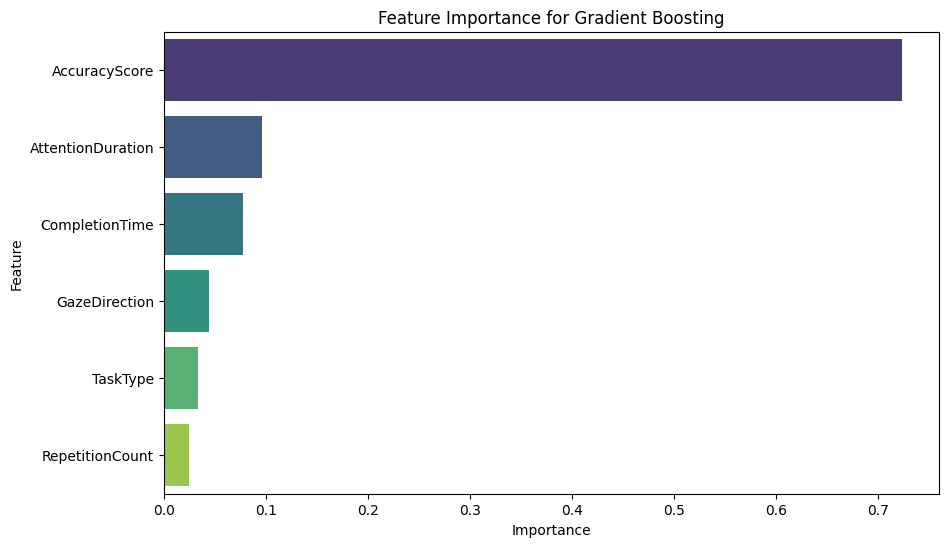

In [10]:
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = data.drop(columns=['EngagementScore', 'ChildID']).columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Feature Importance for {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print(f"The best model ({best_model_name}) does not support feature importance.")

In [11]:
# Step 4: Output Results
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                        MSE        R2
Linear Regression  0.002988  0.424655
Random Forest      0.003153  0.392779
Gradient Boosting  0.002872  0.446990


In [12]:
import joblib

best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

# Save the model to a file
model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.joblib'
joblib.dump(best_model, model_filename)
print(f"Best model ({best_model_name}) saved as '{model_filename}'.")

Best model (Gradient Boosting) saved as 'best_model_gradient_boosting.joblib'.


In [13]:
# Load the saved model
loaded_model = joblib.load(model_filename)
print(f"Loaded model: {loaded_model}")

Loaded model: GradientBoostingRegressor(random_state=42)


In [14]:
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the predictions
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print("\nEvaluation of Loaded Model:")
print(f"Mean Squared Error: {mse_loaded:.4f}")
print(f"R2 Score: {r2_loaded:.4f}")


Evaluation of Loaded Model:
Mean Squared Error: 0.0029
R2 Score: 0.4470


In [15]:
new_sample = [[1, 7, 0.95, 2, 1, 18]]
new_sample_scaled = scaler.transform(new_sample)
new_prediction = loaded_model.predict(new_sample_scaled)
print(f"\n Engagement level: {new_prediction[0]:.4f}")


 Engagement level: 0.9997


c:\Users\Ash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
